In [1]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
import json

with open('data/qld_suburbs.json', 'r') as f:
    australia_geo_map = json.load(f)
    
australia_geo_map["features"][550]["properties"]

{'lc_ply_pid': '60276',
 'dt_create': '2016-06-29Z',
 'dt_retire': None,
 'loc_pid': 'QLD599',
 'qld_locali': '2016-08-10Z',
 'qld_loca_1': None,
 'qld_loca_2': 'CHELTENHAM',
 'qld_loca_3': None,
 'qld_loca_4': None,
 'qld_loca_5': 'G',
 'qld_loca_6': None,
 'qld_loca_7': '3'}

In [4]:
import pandas as pd
df_lookup = pd.read_csv("data/qld_coords_lookup.csv")
# df_lookup.dropna(inplace=True)
# df_lookup["Postcode"] = df_lookup["Postcode"].astype(int)
df_lookup

,Suburb,State,Postcode,Lat,Lng,Bounds_N,Bounds_E,Bounds_S,Bounds_W
0,Abba River,WA,6280,-33.755545,115.331169,-33.575283,115.587865,-33.839733,114.986668
1,Abbeyard,VIC,3737,-36.846683,146.696286,-36.428091,147.117240,-37.215767,146.566453
2,Abbeywood,QLD,4613,-26.164864,151.602468,-26.001925,151.696582,-26.349839,151.013243
3,Abbotsbury,NSW,2176,-33.870941,150.878382,-33.846458,150.918840,-33.891044,150.842448
4,Abbotsford,NSW,2046,-33.856669,151.131581,-33.843676,151.149801,-33.874190,151.111614
...,...,...,...,...,...,...,...,...,...
10201,Zeerust,VIC,3634,-36.226680,145.425012,-36.159943,145.631651,-36.301217,145.260259
10202,Zetland,NSW,2017,-33.901536,151.207330,-33.895166,151.215860,-33.912229,151.199000
10203,Zillmere,QLD,4034,-27.364568,153.044193,-27.328304,153.093027,-27.383358,153.001069
10204,Zilzie,QLD,4710,-23.267370,150.826049,-23.217329,150.854761,-23.321890,150.764414


In [5]:
import pandas as pd
df = pd.read_csv("data/survey_postcodes.csv")
df_counts = pd.DataFrame(df.Postcode.value_counts().reset_index().values, columns=["Postcode", "value"])
df_counts.head()

,Postcode,value
0,4551,15
1,4216,14
2,4870,13
3,4350,13
4,4655,12


In [18]:
# Append lat/lon column
def get_lat(postcode):
    lat = df_lookup[df_lookup["Postcode"] == postcode].reset_index()["Lat"]
    if lat.empty:
        return pd.NA
    return lat[0]

def get_lng(postcode):
    lat = df_lookup[df_lookup["Postcode"] == postcode].reset_index()["Lng"]
    if lat.empty:
        return pd.NA
    return lat[0]
    
df_counts["Lat"] = df_counts["Postcode"].map(get_lat)
df_counts["Lng"] = df_counts["Postcode"].map(get_lng)
df_counts.dropna(inplace=True)
df_counts.head()

,Postcode,value,"(Lat, Lon)",Lat,Lng
0,4551,15,"Lat -26.797740 Lng 153.135935 Name: 0, d...",-26.79774,153.135935
1,4216,14,"Lat -27.900403 Lng 153.403629 Name: 0, d...",-27.900403,153.403629
2,4870,13,"Lat -16.918648 Lng 145.740550 Name: 0, d...",-16.918648,145.74055
3,4350,13,"Lat -27.556488 Lng 151.953318 Name: 0, d...",-27.556488,151.953318
4,4655,12,"Lat -25.296525 Lng 152.823546 Name: 0, d...",-25.296525,152.823546


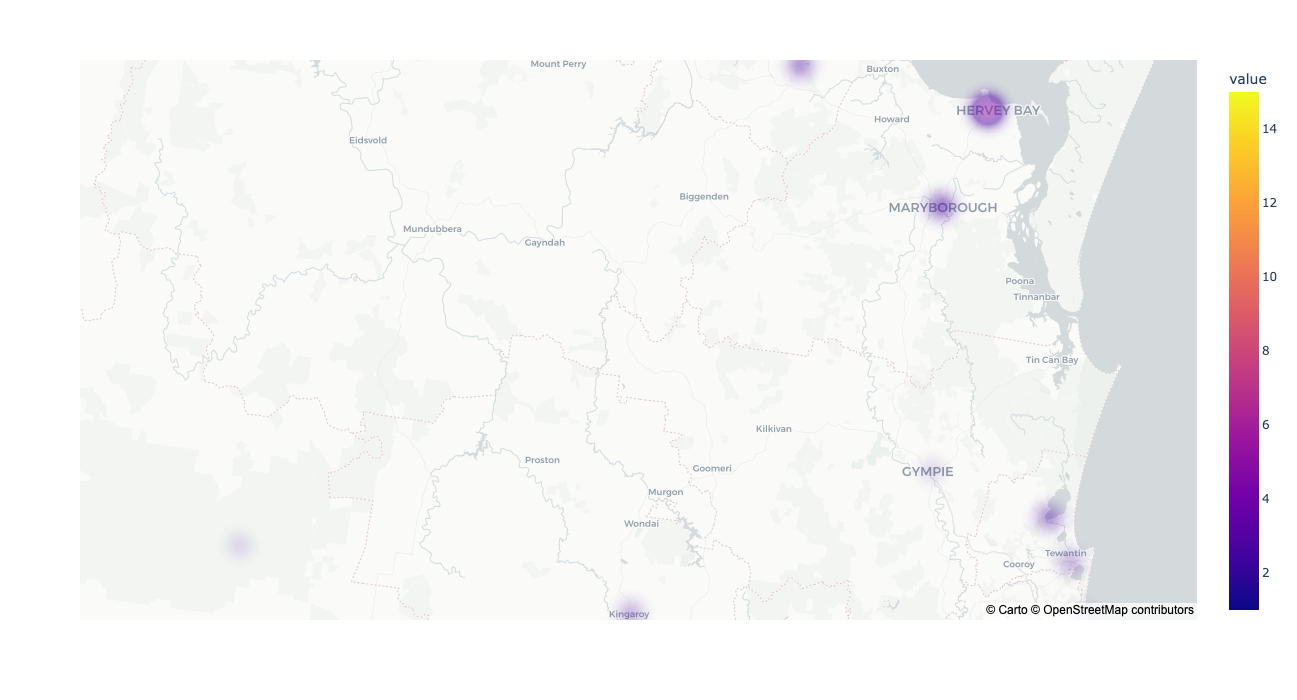

In [22]:
import plotly.express as px

fig = px.density_mapbox(df_counts, lat='Lat', lon='Lng', z='value', height=700, mapbox_style="carto-positron", opacity=0.5)
 
fig.show()